Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU State: cuda:0
/content/drive/MyDrive/112-1/人工智慧/1030/trainset
['Center', 'Donut', 'Edge_Loc', 'Edge_Ring', 'Loc', 'Near-full', 'Random', 'Scratch']
[0, 1, 2, 3, 4, 5, 6, 7]
[('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center0.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center1.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center10.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center100.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center101.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center102.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center103.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center104.jpg', 0), ('/content/drive/MyDrive/112-1/人工智慧/1030/trainset/Center/Center105.jpg', 0), ('/co

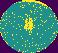

RGB
Visualizing some random training batch...


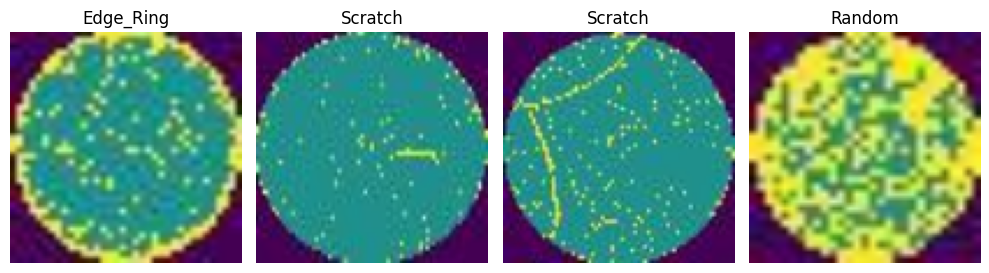

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1,    20] loss: 1.654
[1,    40] loss: 1.564
[1,    60] loss: 1.435
[1,    80] loss: 1.479
[1,   100] loss: 1.183
[1,   120] loss: 1.076
[1,   140] loss: 1.182
[1,   160] loss: 1.074
[1,   180] loss: 0.597
[1,   200] loss: 1.372
[1,   220] loss: 0.709
[1,   240] loss: 1.091
[1,   260] loss: 1.466
[1,   280] loss: 0.743
[1,   300] loss: 0.962
[1,   320] loss: 0.492
[1,   340] loss: 0.536
[1,   360] loss: 0.701
[1,   380] loss: 0.946
[1,   400] loss: 0.862
[1,   420] loss: 0.738
[1,   440] loss: 0.696
[1,   460] loss: 1.113
[1,   480] loss: 0.909
[1,   500] loss: 0.996
[1,   520] loss: 0.773
[1,   540] loss: 0.831
[1,   560] loss: 0.678
[1,   580] loss: 1.160
[1,   600] loss: 1.095
[1,   620] loss: 0.889
[1,   640] loss: 0.886
[1,   660] loss: 0.639
[1,   680] loss: 0.877
[1,   700] loss: 0.676
[1,   720] loss: 0.817
[1,   740] loss: 0.666
[1,   760] loss: 0.596
[1,   780] loss: 0.565
[1,   800] loss: 0.529
[1,   820] loss: 0.826
[1,   840] loss: 0.737
[1,   860] loss: 0.584
[1,   880] 

In [2]:
# Import necessary libraries
from google.colab import drive
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.utils.data as data
from torchvision.utils import make_grid
from torchvision import transforms
from collections import Counter
from PIL import Image
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pandas as pd
import random
import os

# Enable inline display of plots
%matplotlib inline

# Future module for Python 2/3 compatibility
from __future__ import print_function, division

# Additional imports
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import copy

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Check if GPU is available and set the device accordingly
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

# Set hyperparameters
NUM_EPOCHS = 20
BATCH_SIZE = 4
LR = 0.0013

# Define paths to training and testing directories
train_dir = os.path.join(os.getcwd(),"/content/drive/MyDrive/112-1/人工智慧/1030/trainset")
test_dir = os.path.join(os.getcwd(),"/content/drive/MyDrive/112-1/人工智慧/1030/testset")
print(train_dir)

# Define image transformations for preprocessing
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize images to 100x100
    transforms.ToTensor()           # Convert images to PyTorch tensors
])

# Load and transform the training dataset
train_data = torchvision.datasets.ImageFolder(root=train_dir, transform=TRANSFORM_IMG)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=1)

# Extract and print class information from the dataset
x = list(train_data.class_to_idx.values())
print(train_data.classes)
print(x)
print(train_data.imgs)
print(dict(Counter(train_data.targets)))

# Display an example image
im = Image.open(train_data.imgs[0][0])
display(im)
print(im.mode)

# Function to visualize a batch of training data
def visualize_batch(batch, classes, dataset_type):
    fig = plt.figure("{} batch".format(dataset_type), figsize=(10, 10))
    for i in range(0, BATCH_SIZE):
        ax = plt.subplot(2, 4, i + 1)
        image = batch[0][i].cpu().numpy()
        image = image.transpose((1, 2, 0))
        image = (image * 255.0).astype("uint8")
        idx = batch[1][i]
        label = classes[idx]
        plt.imshow(image)
        plt.title(label)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Visualize a batch of training data
trainBatch = next(iter(train_data_loader))
print("Visualizing some random training batch...")
visualize_batch(trainBatch, train_data.classes, "train")

# Load a pre-trained ResNet18 model and modify it for our dataset
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(train_data.classes))
model_ft = model_ft.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=LR, momentum=0.9)

# Training loop
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 20 == 19:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

print('Finished Training')

# Save the trained model
PATH = 'HW3_model.pth'
torch.save(model_ft.state_dict(), PATH)

# Load the trained model for testing
model_test = model_ft
model_test.load_state_dict(torch.load(PATH))
model_test.eval()

# Testing loop
correct = 0
total = 0
res = []
with torch.no_grad():
    for i in range(1001):
        tpath = os.path.join(test_dir+'/',str(i)+'.jpg')
        fopen = Image.open(tpath)
        image = TRANSFORM_IMG(fopen)
        image = image.unsqueeze(0).to(device)
        outputs = model_test(image)
        _, predicted = torch.max(outputs.data, 1)
        for j in range(len(predicted)):
            res.append(str(train_data.classes[predicted[j]]))
print('Predict finished')

# Create a DataFrame for submission and save it
df_ans = pd.DataFrame(res, columns=['Category'])
df_ans.to_csv('mySubmission.csv', index_label='ID')
